In [85]:
import numpy
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

In [86]:
def naiveVR(pos, epsilon):
    pairs = [(a, b) for i, a in enumerate(list(pos.keys())) for b in list(pos.keys())[i + 1:]]
    vrComplex = [(x,y) for (x,y) in pairs if ((pos[x][0] - pos[y][0])**2 + (pos[x][1] - pos[y][1])**2) <= 2*epsilon]
    return vrComplex

In [87]:
def generate_point_cloud(n, parametrization):
    """
    :param n: size of the point cloud
    :return: a graph with no edges, G
    """
    if n < 3:
        print("generate_point_cloud: please give an n >= 3.")
        return None

    pos = {}
    for i in range(n):
        pos[i] = parametrization(random.random())

    return pos

In [88]:
def circle_param(t):
    return (math.cos(t*2*math.pi), math.sin(t*2*math.pi))

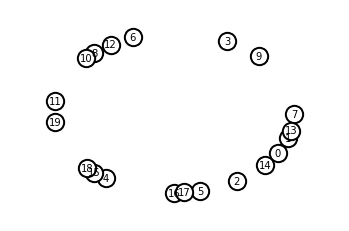

In [112]:
n = 20
pos = generate_point_cloud(n, circle_param)

G = nx.Graph()

for i in range(n):
    G.add_node(i)

options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()



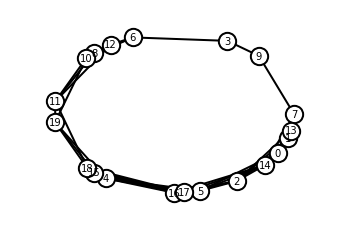

In [119]:
edges = naiveVR(pos, 0.4)
G.remove_edges_from(G.edges())
for edge in edges:
    G.add_edge(edge[0], edge[1])

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()